In [2]:
#Import libraries 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split



In [45]:
#Import EMG Dataset
X = np.genfromtxt('traing_matrix05.csv', delimiter=',', skip_header=2)
X1 = np.genfromtxt('test_matrix05.csv', delimiter=',', skip_header=2)

m,n = np.shape(X)

x_train = []
y_train = [] 
x_test = []
y_test = []


#Split data x_train, y_train
x_train = X[:,0:n-7]
y_train = X[:,65:71]


#Test data 
x_test = X1[:,0:n-7]
y_test = X1[:,65:71]

y_class_test=X1[:,64]


In [46]:
print(len(x_train))
print(np.shape(x_train))

624
(624, 64)


In [54]:
x_train[0::2]

array([[1.53739090e-02, 8.52083700e-03, 7.25140480e-02, ...,
        1.05110586e+00, 9.62306103e-01, 1.76000000e-05],
       [1.00000000e+00, 2.98434315e-01, 1.00000000e+00, ...,
        9.47768983e-01, 1.05049811e+00, 5.01683540e-02],
       [2.49319582e-01, 8.06432680e-02, 1.92366226e-01, ...,
        1.30364188e+00, 1.00893665e+00, 1.02769700e-03],
       ...,
       [2.32390450e-02, 1.22006820e-02, 1.38629252e-01, ...,
        1.15348824e+00, 9.86817444e-01, 1.69000000e-05],
       [1.00000000e+00, 2.59429198e-01, 1.00000000e+00, ...,
        8.53206535e-01, 9.87583901e-01, 5.45115390e-02],
       [3.15583213e-01, 8.19229590e-02, 1.02769108e-01, ...,
        1.12806468e+00, 1.01548630e+00, 1.00955200e-03]])

In [73]:
x_train_cl=[]

for i in range(len(x_train)):
    x_train_cl.append([])
    h=0
    for j in range (0, 8):
        x_train_cl[i].append([])
        x_train_cl[i][h]=x_train[i][0+8*j]
        h=h+1
        x_train_cl[i].append([])
        x_train_cl[i][h]=x_train[i][1+8*j]
        h=h+1
        x_train_cl[i].append([])
        x_train_cl[i][h]=x_train[i][4+8*j]
        h=h+1
        

        
            

In [105]:
print(len(x_train_cl))

624


In [107]:
x_train_cl2=[]
h=0
for i in range(104):
    x_train_cl2.append([])
    x_train_cl2[h]=x_train_cl[1+6*i]
    h=h+1
    x_train_cl2.append([])
    x_train_cl2[h]=x_train_cl[3+6*i]
    h=h+1


In [112]:
print(np.shape(x_train_cl2))
print(h)
print((x_train_cl2))


(208, 24)
208
[array([0.75600344, 0.2136959 , 0.92869656, 0.65401791, 0.22077056,
       0.9593418 , 0.46081472, 0.16385472, 0.71195217, 0.4405241 ,
       0.18439937, 0.80128316, 0.2638664 , 0.10747249, 0.46695086,
       0.70523053, 0.24478968, 1.06362397, 0.93788795, 0.28896957,
       1.25579061, 0.91813703, 0.41702526, 1.81236088]), array([0.51353525, 0.06888922, 0.31660278, 0.59511379, 0.19441435,
       0.89347649, 0.80140239, 0.22246255, 1.02237924, 1.        ,
       0.29022119, 1.33383716, 0.97261442, 0.30574458, 1.4051827 ,
       1.        , 0.24619291, 1.13146616, 0.61376509, 0.19441528,
       0.89348111, 0.69665182, 0.21836791, 1.00357436]), array([0.66669479, 0.24862509, 1.343554  , 0.85108961, 0.27060103,
       1.46228508, 0.27944453, 0.09368763, 0.50623708, 0.26920672,
       0.07931297, 0.42858078, 0.51656805, 0.15124382, 0.81729557,
       0.52519395, 0.17874723, 0.96592589, 0.83941033, 0.21310627,
       1.15163004, 0.8940156 , 0.24509547, 1.32449156]), array([0.3

In [127]:
from sklearn.cluster import AgglomerativeClustering
clus=2
xx1_train=((x_train_cl2))
cluster = AgglomerativeClustering(n_clusters=clus, affinity='euclidean', linkage='ward')
clusters=cluster.fit_predict(xx1_train)

In [128]:
print(clusters)
print(len(clusters))
x_train_cl2=np.asarray(x_train_cl2)

[0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1
 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1]
208


208


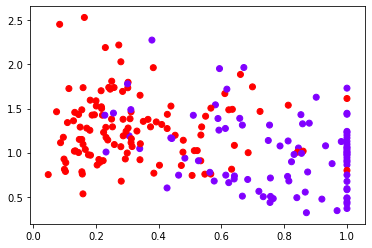

In [137]:
from mpl_toolkits.mplot3d import Axes3D
print(len(clusters))
plt.scatter(x_train_cl2[:,0],x_train_cl2[:,8], c=cluster.labels_, cmap='rainbow')

In [25]:
print((1/6)%(1/6))

0.0
